In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import load_model

In [2]:
model = load_model('/models/HSC_v6_small_VAE_v2/model')
model.compile(optimizer='adam', loss='mse')

In [3]:
model.decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5120)              87040     
_________________________________________________________________
reshape_2 (Reshape)          (None, 5, 32, 32)         0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 5, 64, 64)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 32, 64, 64)        1472      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 32, 128, 128)      0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 32, 128, 128)      9248

In [4]:
model.encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 5, 127, 127) 0                                            
__________________________________________________________________________________________________
padding (ZeroPadding2D)         (None, 5, 128, 128)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 128, 128) 1472        padding[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 32, 64, 64)   0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [15]:
n_to_show = 5
LATENT_DIM = 16
reconst_images = model.decoder.predict(np.random.normal(0,1,size=(n_to_show,LATENT_DIM)))

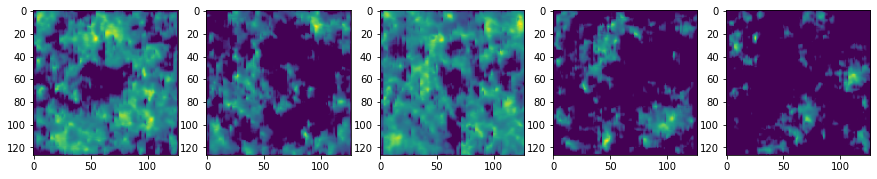

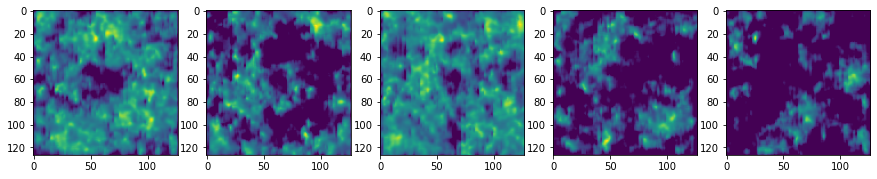

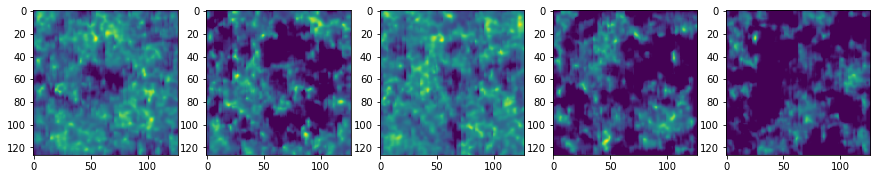

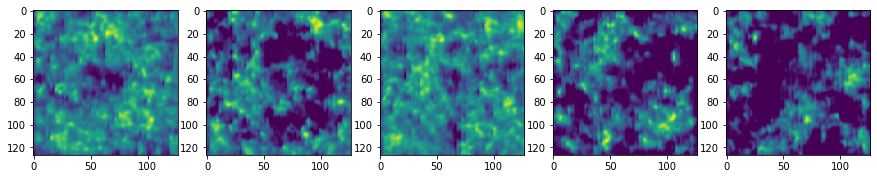

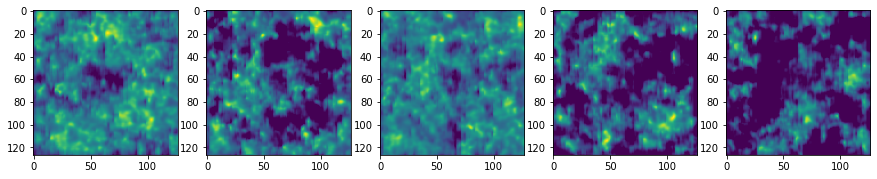

In [25]:
for j in range(5):
    fig = plt.figure(figsize=(15, 10))
    for i in range(n_to_show):
        img = reconst_images[i].squeeze()
        sub = fig.add_subplot(2, n_to_show, i+1)
        sub.imshow(img[j])